<a href="https://colab.research.google.com/github/anupj/PyTorchForDeepLearningBootcamp/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library in PyTorch - [docs](https://pytorch.org/vision/stable/index.html)
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.5.1+cu121
0.20.1+cu121


## 1. Getting a dataset
We will use `FashionMNIST` dataset from [torchvision](https://pytorch.org/vision/0.19/generated/torchvision.datasets.FashionMNIST.html) module in PyTorch library.

In [2]:
# Setup training data

train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train=True, # if `true` then we want training dataset instead of testing dataset
    download=True, # do we want to download it? y/n
    transform=transforms.ToTensor(), # How do we want to transform the data?
    target_transform=None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 128MB/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.32MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 56.8MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
print(f"image: {image}")
print(f"label: {label}")


image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f" Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

 Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

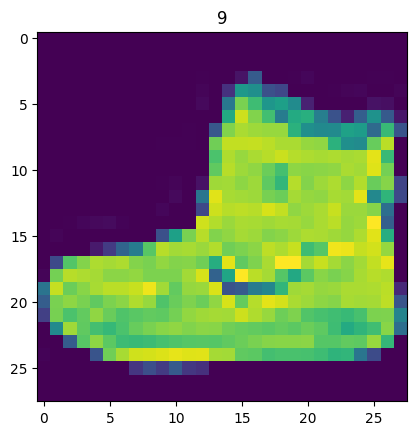

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# we are going to use matplotlib to show our image
plt.imshow(image.squeeze())
plt.title(label)
image

(-0.5, 27.5, 27.5, -0.5)

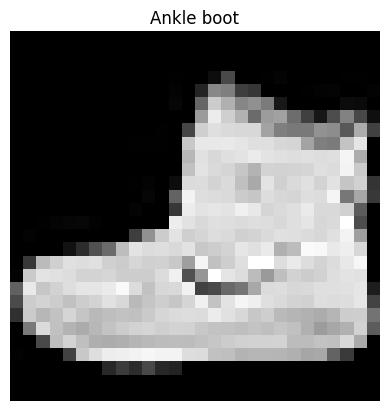

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

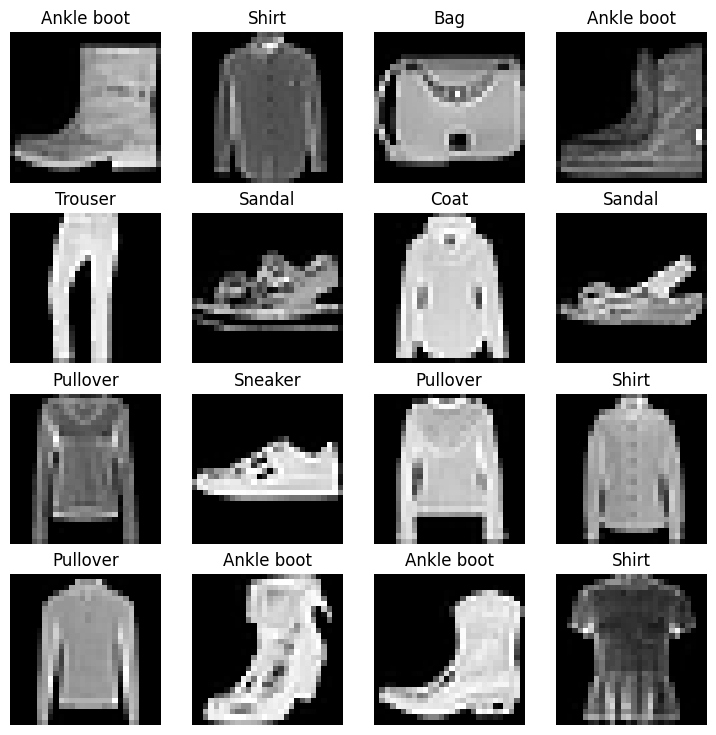

In [11]:
# Plot sample images from the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i) #(rows, cols, index)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.
**DataLoader** turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches (or mini-batches) - why would we do this?

1. It is more computationally efficient, i.e. your computing h/w may not be able to look (store in memory) at 60,000 images in one hit. So we break it down to 32 images at a time (batch size of ~32)
2. It gives our NN more chances to update its **gradient** per epoch

Link to understand this better - https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a


### 2.1 Create mini-batches

In [13]:
# Create mini-batches
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn MNIST dataset into batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)


# Let's print out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size 32")
print(f"Length of test_dataloader: {len(test_dataloader)}  batches of size 32")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7901b3419e40>, <torch.utils.data.dataloader.DataLoader object at 0x7901b341b490>)
Length of train_dataloader: 1875 batches of size 32
Length of test_dataloader: 313  batches of size 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### 2.2 Visualize the mini-batches

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


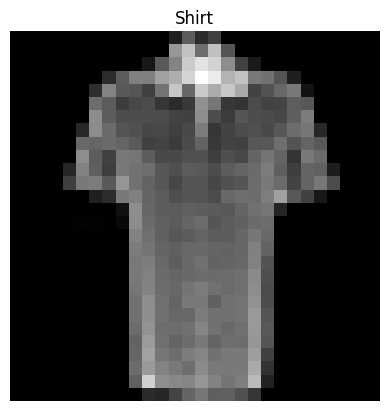

In [15]:
# Show a random shape from a batch
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## 3. Model 0: Build a baseline vision model

When starting to build a series of machine learning models, it is best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon with subsequent models.

Start simple and add complexity when necessary.

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample batch
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # performs forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


### 3.1 Define v0 model

In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                   out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28 x 28
    hidden_units=10, # num of neurons in a layer
    output_shape=len(class_names) # one for every class
).to("cpu")

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.2 Setup loss, optimizer and evaluation metrics

* **Loss function** - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* **Optimizer** - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* **Evaluation metric** - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [21]:
import requests
from pathlib import Path

# Download helper functions from learnpytorch repo
if Path("helper_functions.py").is_file():
  print("helper functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Downloaded and saved")


Downloaded and saved


In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.3 Creating a function to time our experiments

Machine learning is very experimental.

You'll want to track two main things:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs  

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time,
                 end=end_time
                )

Train time on None: 0.000 seconds


4.717299999867919e-05

### 3.4 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all to check how fast the model is

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader): # X=image, y=label
    model_0.train() # set it into training mode
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumlate the loss per batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    # Note we are optimising our models parameter per batch
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval() # Set the model into evaluation mode
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5102, Test acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4743 | Test loss: 0.5268, Test acc: 81.6793
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4537 | Test loss: 0.5126, Test acc: 82.9972
Train time on cpu: 29.958 seconds


## 4. Make predictions and get Model 0 results


In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predictions on data_loader"""
  loss, acc = 0, 0
  model.eval() # set it in evaluation mode
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Forward pass - make predictions
      y_pred = model(X)

      # Calculate and accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Find the average loss and accuracy values
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [27]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [28]:

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [29]:
# Create a model with non-linear and linear_layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU(),

    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [30]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of flatten after our 28*28 image goes in
                              hidden_units=10, # num of units/neuron in the hidden layer
                              output_shape=len(class_names)).to(device) # send to GPU if available

In [31]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [32]:
from helper_functions import accuracy_fn

# Create a loss function and optimiser for model_1
loss_fn = nn.CrossEntropyLoss() # calculates or measures how *wrong* our model is

# An optimizer updates the model's parameters to reduce the loss
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Create functions for training and evaluation/testing loops

* Create `train_step()` for training loop
* Create `test_step()` for test loop

In [33]:
# Creating a function of training step

def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
  """ Performs training with model trying to learn on data_loader."""

  train_loss = 0
  train_acc = 0

  # set it into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader): # X=image, y=label
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # outputs raw logits

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumlate the loss per batch
    train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1) # raw logits -> prediction labels
                              )

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    # Note: we are optimising our models parameter per batch
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"\nTraining loss: {train_loss:.5f} | Training accuracy: {train_acc:.2f}%\n")

In [34]:
# Create a function for test step

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  """Performs testing with model on test data_loader"""
  test_loss, test_acc = 0, 0
  model.eval() # Put the model into evaluation mode

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Set the device on the data
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # calculate the test loss and accuracy average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    # Print out what's happening
    print(f"\nTesting loss: {test_loss:.5f}, Testing accuracy: {test_acc:.2f}%\n")

### 6.3 Train and test model_1 using the newly defined methods

In [35]:
# Train and test model_1

# start by setting the manual seed
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using `train_step()` and `test_step`
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 =  print_train_time(start=train_time_start_on_gpu,
                                             end=train_time_end_on_gpu,
                                             device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------

Training loss: 1.09199 | Training accuracy: 61.34%


Testing loss: 0.95690, Testing accuracy: 64.98%

Epoch: 1
--------

Training loss: 0.73779 | Training accuracy: 73.69%


Testing loss: 0.72388, Testing accuracy: 74.21%

Epoch: 2
--------

Training loss: 0.66776 | Training accuracy: 76.08%


Testing loss: 0.68751, Testing accuracy: 75.64%

Train time on cuda: 31.189 seconds


Sometimes depending on your data/h/w you might find that your model trains faster on CPU than GPU.

See this excellent article as a resource:
https://horace.io/brrr_intro.html

In [36]:

# rewriting `eval_model` to be device agnostic
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Returns a dictionary containing the results of model predictions on data_loader"""
  loss, acc = 0, 0
  model.eval() # set it in evaluation mode
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Forward pass - make predictions
      y_pred = model(X)

      # Calculate and accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Find the average loss and accuracy values
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [37]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [38]:
model_1_results, model_0_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6881523728370667,
  'model_acc': 75.61900958466454},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.512529730796814,
  'model_acc': 83.00718849840256})

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as **ConvNets**
CNN's are also known for finding patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [39]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the Tiny VGG
  model from CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    # A typical CNN architecture is composed of "blocks"
    # A block is composed of one or more layers
    self.conv_block_1 = nn.Sequential(
        # `kernel_size`, `stride`, and `padding` are hyperparameters which are values that we set ourselves
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    # this is the output layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [40]:
# Instantiate an instance of v2 cnn model
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [41]:
print(f"image shape: {image.shape}")
print(f"image.squeeze().shape: {image.squeeze().shape}")
print(f"image.unsqueeze().shape: {image.unsqueeze(0).shape}")
print(f"image shape: {image.shape}")

image shape: torch.Size([1, 28, 28])
image.squeeze().shape: torch.Size([28, 28])
image.unsqueeze().shape: torch.Size([1, 1, 28, 28])
image shape: torch.Size([1, 28, 28])


image shape: torch.Size([1, 28, 28])
image shape: torch.Size([1, 28, 28])


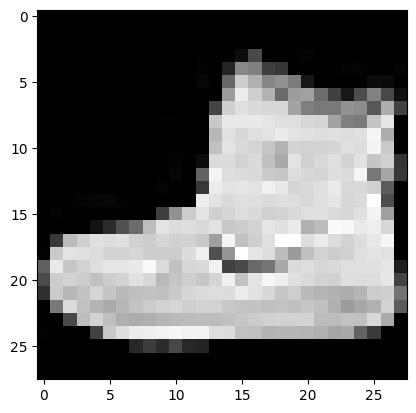

In [42]:
print(f"image shape: {image.shape}")
image = image.to(device)
plt.imshow(image.squeeze().cpu(), cmap="gray")
print(f"image shape: {image.shape}")

In [43]:
print(f"image.shape is: {image.shape}")
print(f"image.unsqueeze().shape: {image.unsqueeze(0).shape}")
model_2(image.unsqueeze(0))
print(f"image.shape is: {image.shape}")


image.shape is: torch.Size([1, 28, 28])
image.unsqueeze().shape: torch.Size([1, 1, 28, 28])
image.shape is: torch.Size([1, 28, 28])


In [44]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
# Pass the image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1. Steppng through `nn.Conv2d()`

[Conv2d docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

In [46]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64)) # (batch_num, num_channels, height, width)
first_image = images[0]
print(f"images tensor shape: {images.shape}")
print(f"first image tensor shape: {first_image.shape}")
print(f"first image:\n{first_image}")

images tensor shape: torch.Size([32, 3, 64, 64])
first image tensor shape: torch.Size([3, 64, 64])
first image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

    

In [47]:
torch.__version__

'2.5.1+cu121'

In [48]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)
print(f"first_image shape: {first_image.shape}\n")
# Pass the data through the convolutional layer
conv_output = conv_layer(first_image)
conv_output.shape

first_image shape: torch.Size([3, 64, 64])



torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`
[docs](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#maxpool2d)

In [49]:
first_image.shape

torch.Size([3, 64, 64])

In [50]:
# Print out the original test image without unsqueezed dimension
print(f"Test image original shape: {first_image.shape}")
print(f"Test image with unsqueezed dimension: {first_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv_layer = conv_layer(first_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv_layer.shape}")

# Pass data through max pool layer
test_image_through_maxpool_layer = max_pool_layer(test_image_through_conv_layer)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_maxpool_layer.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


### 7.3 Setup a loss function and optimizer for our CNN `model_2`

In [51]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing CNN `model_2` using our training and test functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test code
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------

Training loss: 0.59395 | Training accuracy: 78.44%


Testing loss: 0.39985, Testing accuracy: 85.56%

Epoch: 1 
---------

Training loss: 0.35894 | Training accuracy: 87.03%


Testing loss: 0.38113, Testing accuracy: 86.39%

Epoch: 2 
---------

Training loss: 0.32303 | Training accuracy: 88.34%


Testing loss: 0.34423, Testing accuracy: 87.70%

Train time on cuda: 37.479 seconds


In [53]:
# Get model 2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3437938392162323,
 'model_acc': 87.70966453674122}

## 8. Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.688152,75.619010
2,FashionMNISTModelV2,0.343794,87.709665


In [55]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,29.957508
1,FashionMNISTModelV1,0.688152,75.619010,31.189441
2,FashionMNISTModelV2,0.343794,87.709665,37.478976


Text(0, 0.5, 'model')

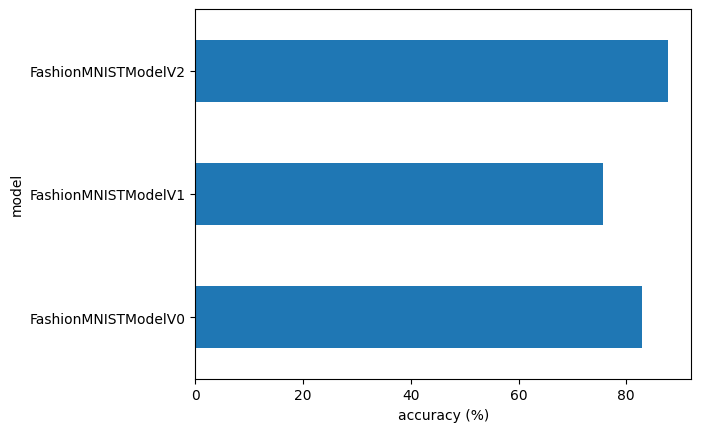

In [56]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel('accuracy (%)')
plt.ylabel("model")

In [57]:
!nvidia-smi

Fri Nov 22 05:25:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              30W /  70W |    167MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [58]:
## 9. Make and evaluate random predictions with best model

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [60]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

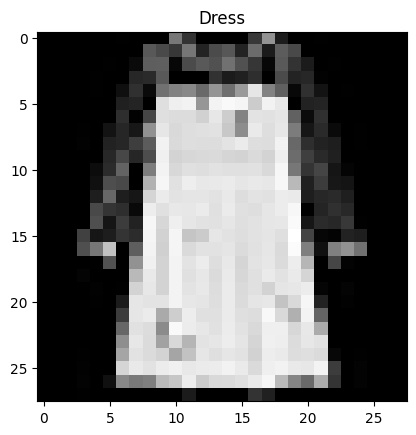

In [61]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [62]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
len(pred_probs)

9

In [63]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 1, 4, 9, 9, 1, 5, 0, 9])

(-0.5, 27.5, 27.5, -0.5)

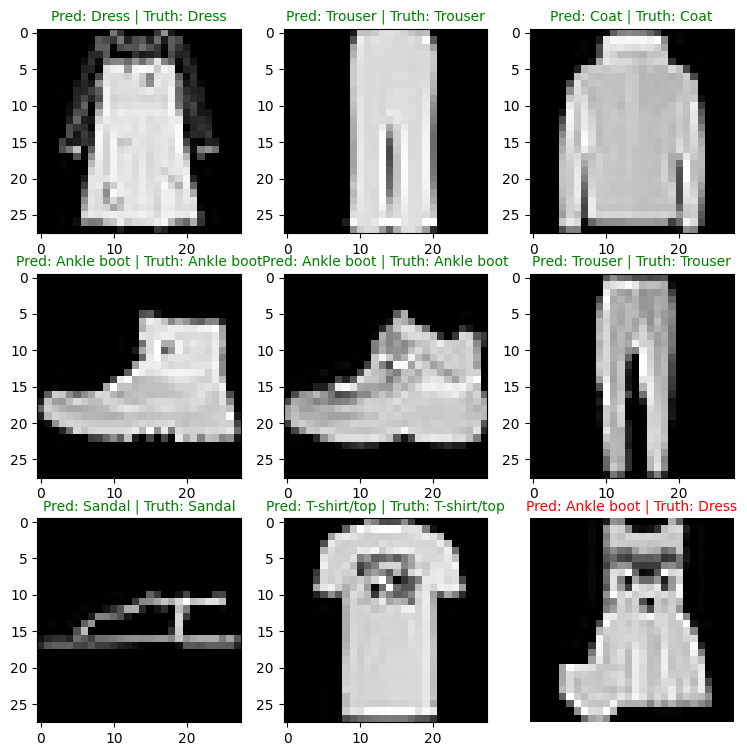

In [64]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change colour of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction is same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction is not same as truth
plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.
1. Make predictions with our trained model on the test dataset
2. Make a [confusion matrix](https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html#id4) `torchmetrics.ConfusionMatrix`
3. [Plot](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [85]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
# NOTE: Adding the `targets` list here to ensure that the labels in both
# y_preds and targets that I'll later use to create the conf matrix have the same label order
# see this Q&A for details https://www.udemy.com/course/pytorch-for-deep-learning/learn/lecture/32881836#questions/18756198
targets = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X,y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
    targets.append(y.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
targets_tensor = torch.cat(targets)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 4, 1,  ..., 2, 8, 8])

In [89]:
predicted_class_names = [class_names[i] for i in y_pred_tensor.numpy()]
print("Predicted class names:", predicted_class_names)

target_class_names = [class_names[i] for i in test_data.targets.numpy()]
print("Target class names:", target_class_names)

Predicted class names: ['Dress', 'Coat', 'Trouser', 'Shirt', 'Sneaker', 'Dress', 'T-shirt/top', 'Trouser', 'Pullover', 'Ankle boot', 'Ankle boot', 'Sneaker', 'Pullover', 'Pullover', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Sneaker', 'Sneaker', 'Dress', 'Coat', 'Sandal', 'Pullover', 'Shirt', 'Sandal', 'Pullover', 'Pullover', 'Bag', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Sneaker', 'T-shirt/top', 'Trouser', 'Dress', 'Sandal', 'Shirt', 'Sandal', 'Bag', 'Ankle boot', 'Shirt', 'Pullover', 'Sneaker', 'Sneaker', 'T-shirt/top', 'Pullover', 'Pullover', 'Pullover', 'Pullover', 'Shirt', 'Coat', 'Dress', 'T-shirt/top', 'Sneaker', 'Trouser', 'Dress', 'Dress', 'Dress', 'Coat', 'Coat', 'Shirt', 'Bag', 'Coat', 'Trouser', 'Trouser', 'Ankle boot', 'Coat', 'Ankle boot', 'Trouser', 'Shirt', 'Trouser', 'Bag', 'Bag', 'Sandal', 'Bag', 'Bag', 'Sneaker', 'T-shirt/top', 'Trouser', 'Bag', 'Pullover', 'Sandal', 'Trouser', 'Sandal', 'Shirt', 'Sneaker', 'Pullover', 'Ankle boot', 'Ankle boot', 'Shirt', 'Sneaker', 'Snea

In [73]:
# sidequest: See if required packages are installed and if not, install them...
from packaging import version
import subprocess

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert version.parse(mlxtend.__version__) >= version.parse("0.19.0"), "mlextend version should be 0.19.0 or higher"
except AssertionError as e:
    print(e)
    print("Updating mlxtend")
    subprocess.check_call(['pip', 'install', '-U', 'mlxtend'])
    print(f"mlextend updated to version: {mlxtend.__version__}")
    import mlxtend # Re-import after installation
except ImportError as e:
    print(e)
    print("Installing torchmetrics...")
    subprocess.check_call(['pip', 'install', '-q', 'torchmetrics'])
    print(f"torchmetrics installed - version: {torchmetrics.__version__} ")
    print("Importing torchmetrics")
    import torchmetrics # import after installation

mlxtend version: 0.23.3


In [75]:
class_names
y_pred_tensor

tensor([2, 9, 6,  ..., 5, 6, 2])

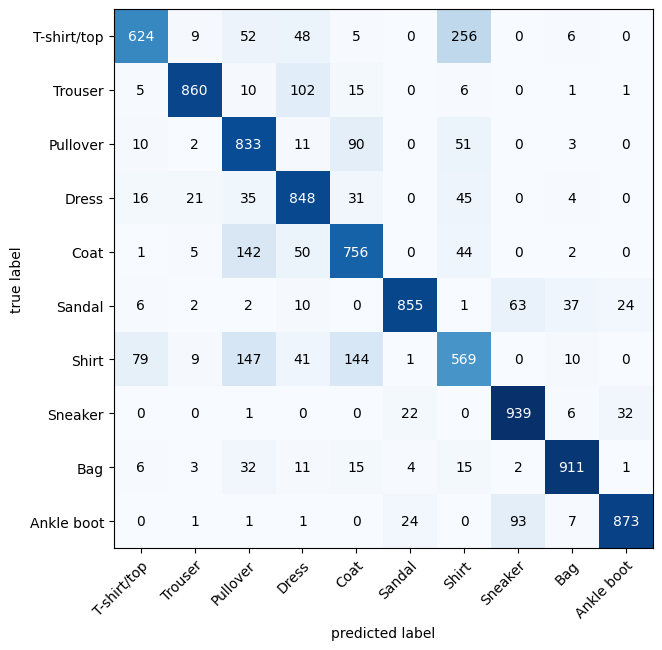

In [87]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# 2. Setup confusion instance and compare `predictions` to `targets`
# Note: PyTorch calls `labels` as `targets`
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=targets_tensor)

# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model


In [91]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [92]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

<ipython-input-92-d3aa727c7c4d>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [95]:
# Evaluate loaded model

print(f" what's our original model_2_results:\n {model_2_results}")

torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

 what's our original model_2_results:
 {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3437938392162323, 'model_acc': 87.70966453674122}


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3440595865249634,
 'model_acc': 87.69968051118211}

In [102]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-03)

tensor(True)